<a href="https://www.kaggle.com/code/syedasimalishah/eda-each-feature-to-churn?scriptVersionId=109045010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_colwidth',150)
sns.set(font_scale=2)

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [7]:
for a in df.select_dtypes("object").columns:
  print(df[a].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.fillna(0,inplace=True)

Text(0.5, 1.0, 'Monthly Charges comparison')

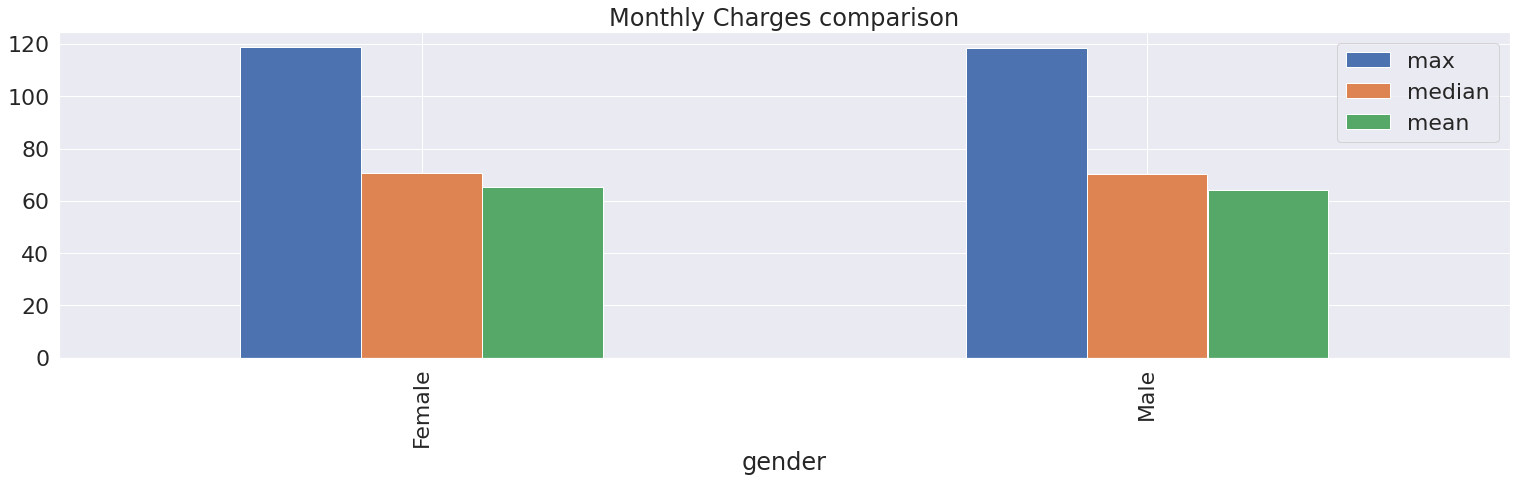

In [10]:
df.groupby('gender')['MonthlyCharges'].agg(['max','median','mean']).plot(kind='bar',figsize=(26,6))
plt.title('Monthly Charges comparison')

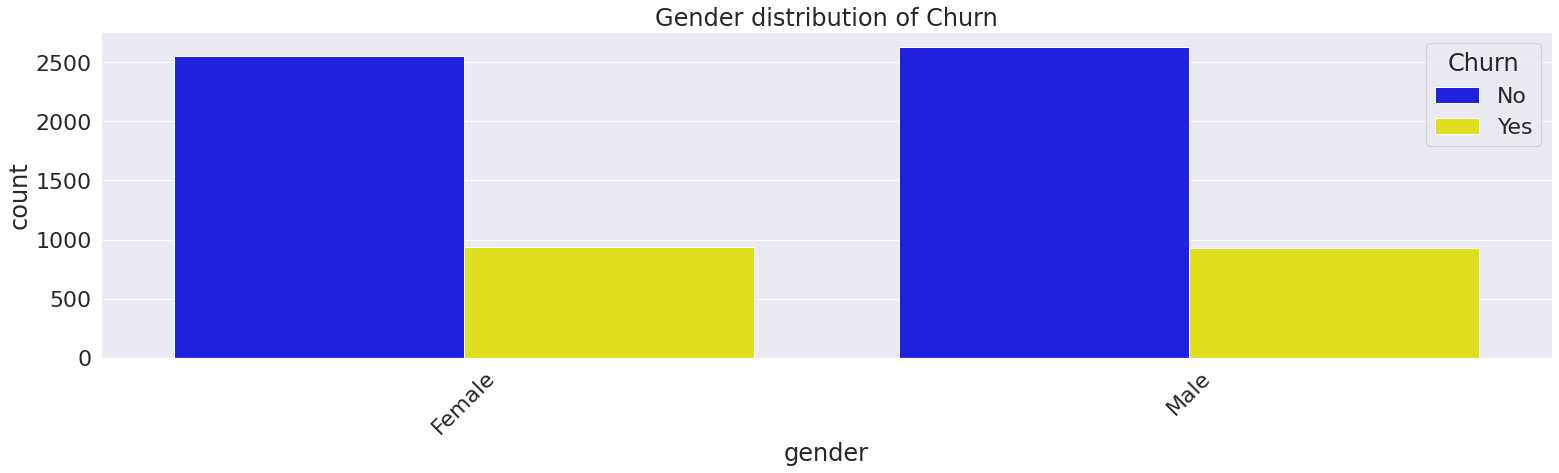

In [11]:
plt.figure(figsize=(26,6))
ax = sns.countplot(data=df, x ='gender',hue = 'Churn',palette=['blue', 'yellow'])
ax.tick_params(axis='x', rotation=45)
plt.title('Gender distribution of Churn')
plt.show()

Text(0.5, 1.0, 'Total Charges comarison')

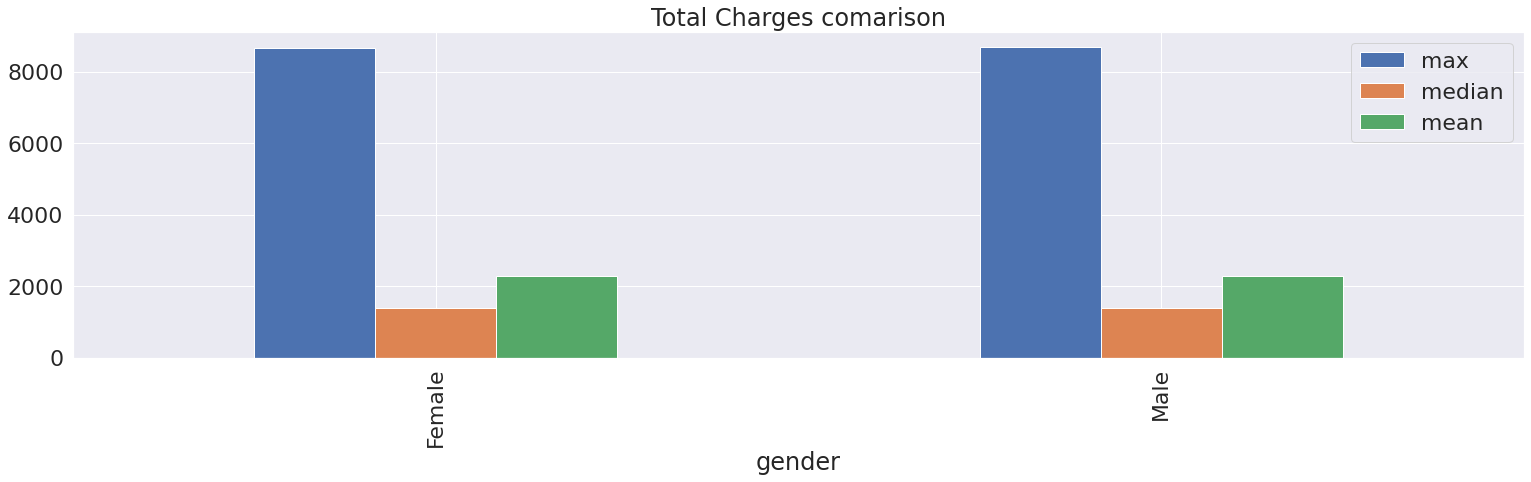

In [12]:
df.groupby('gender')['TotalCharges'].agg(['max','median','mean']).plot(kind='bar',figsize=(26,6))
plt.title('Total Charges comarison')

Text(0.5, 1.0, 'Visualizing Correlation')

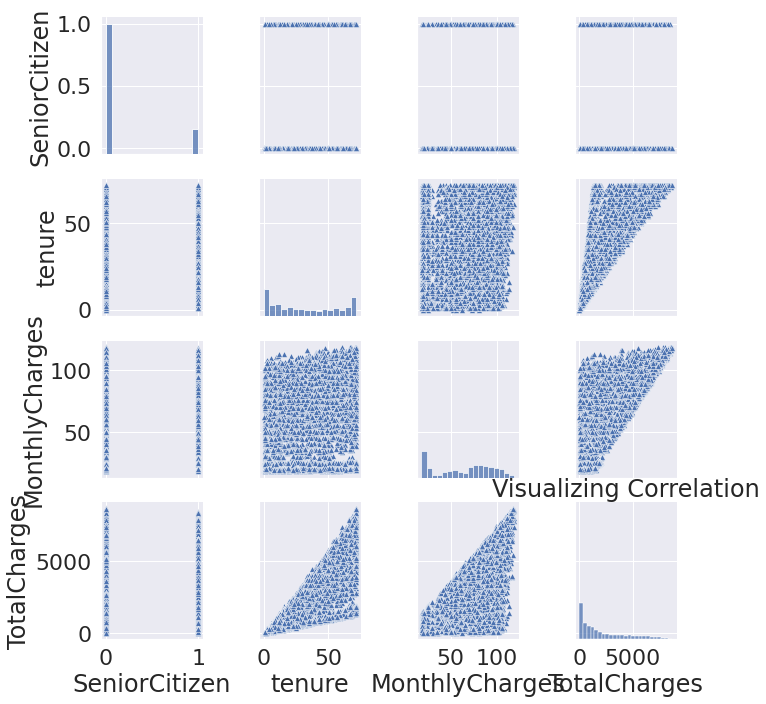

In [13]:
sns.pairplot(data=df,markers='^')
plt.title('Visualizing Correlation')

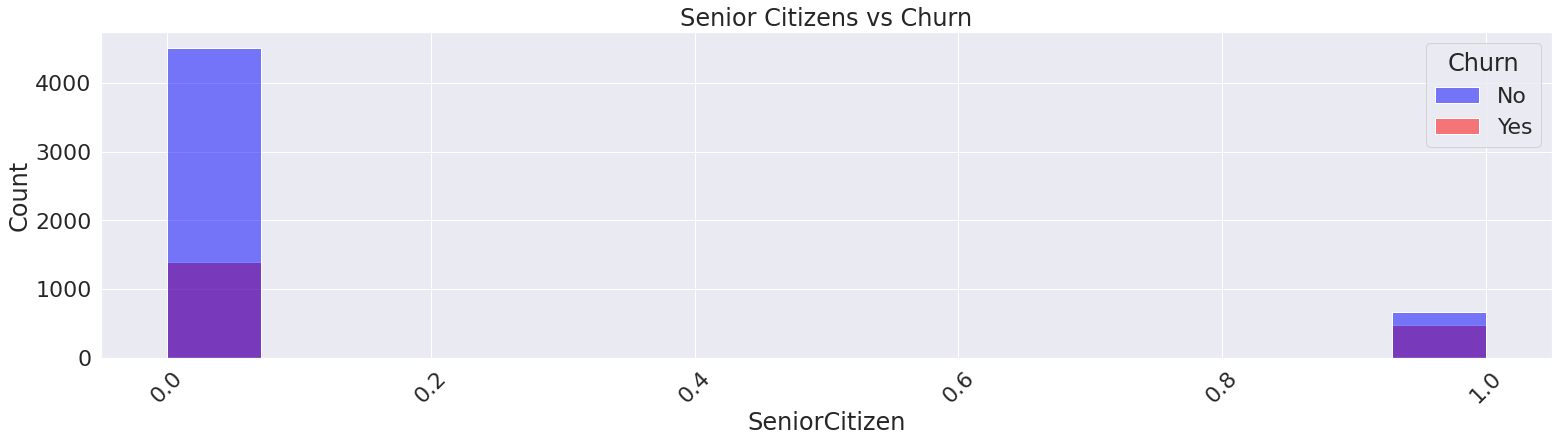

In [14]:
plt.figure(figsize=(26,6))
ax = sns.histplot(data=df, x ='SeniorCitizen',hue = 'Churn',legend=True,palette=['blue', 'red'])
ax.tick_params(axis='x', rotation=45)
plt.title('Senior Citizens vs Churn')
plt.show()

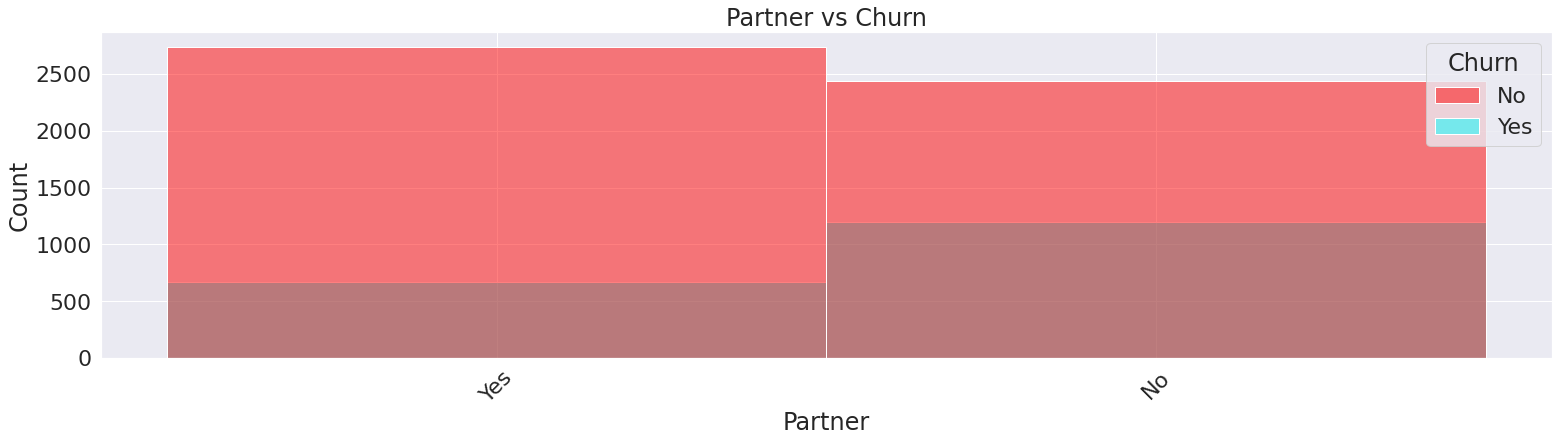

In [15]:
plt.figure(figsize=(26,6))
ax = sns.histplot(data=df, x ='Partner',hue = 'Churn',legend=True,palette=['red', 'cyan'])
ax.tick_params(axis='x', rotation=45)
plt.title('Partner vs Churn')
plt.show()

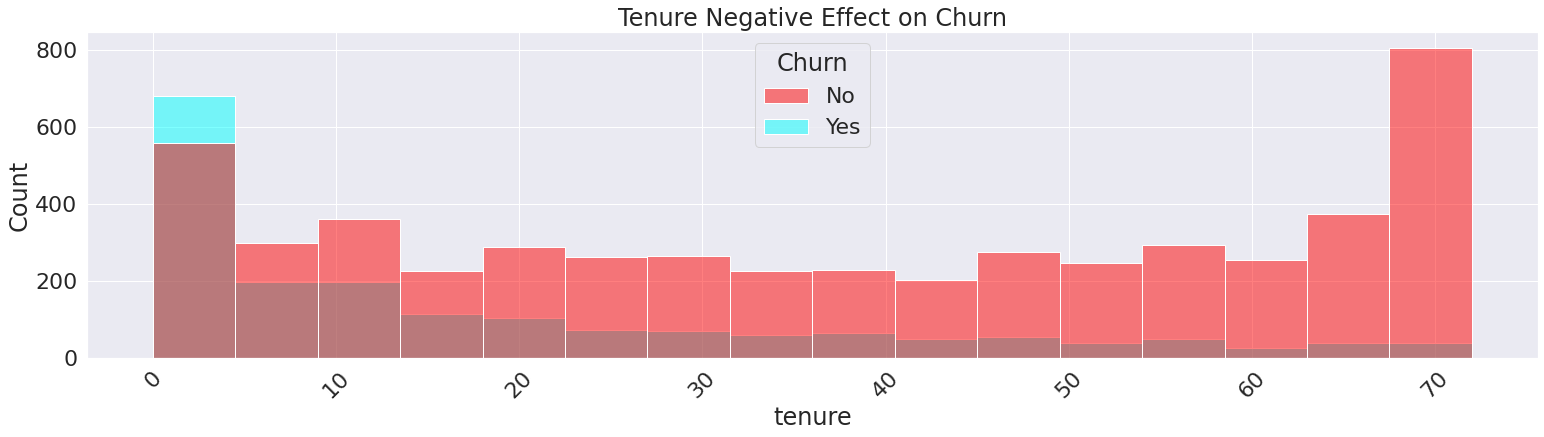

In [16]:
plt.figure(figsize=(26,6))
ax = sns.histplot(data=df, x ='tenure',hue = 'Churn',legend=True,palette=['red', 'cyan'])
ax.tick_params(axis='x', rotation=45)
plt.title('Tenure Negative Effect on Churn')
plt.show()

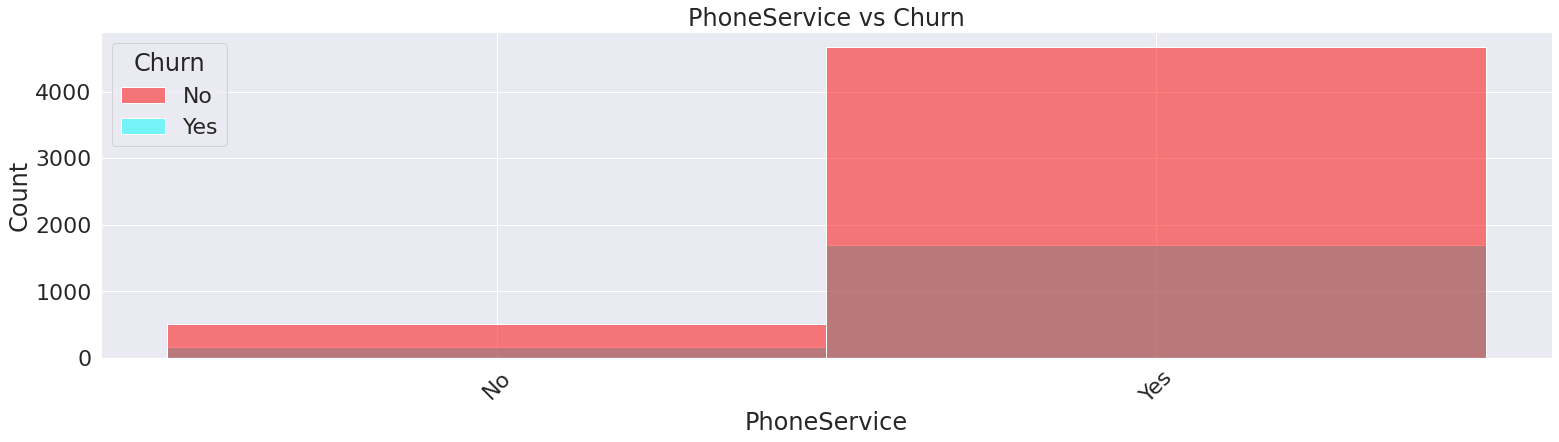

In [17]:
plt.figure(figsize=(26,6))
ax = sns.histplot(data=df, x ='PhoneService',hue = 'Churn',legend=True,palette=['red', 'cyan'])
ax.tick_params(axis='x', rotation=45)
plt.title('PhoneService vs Churn')
plt.show()

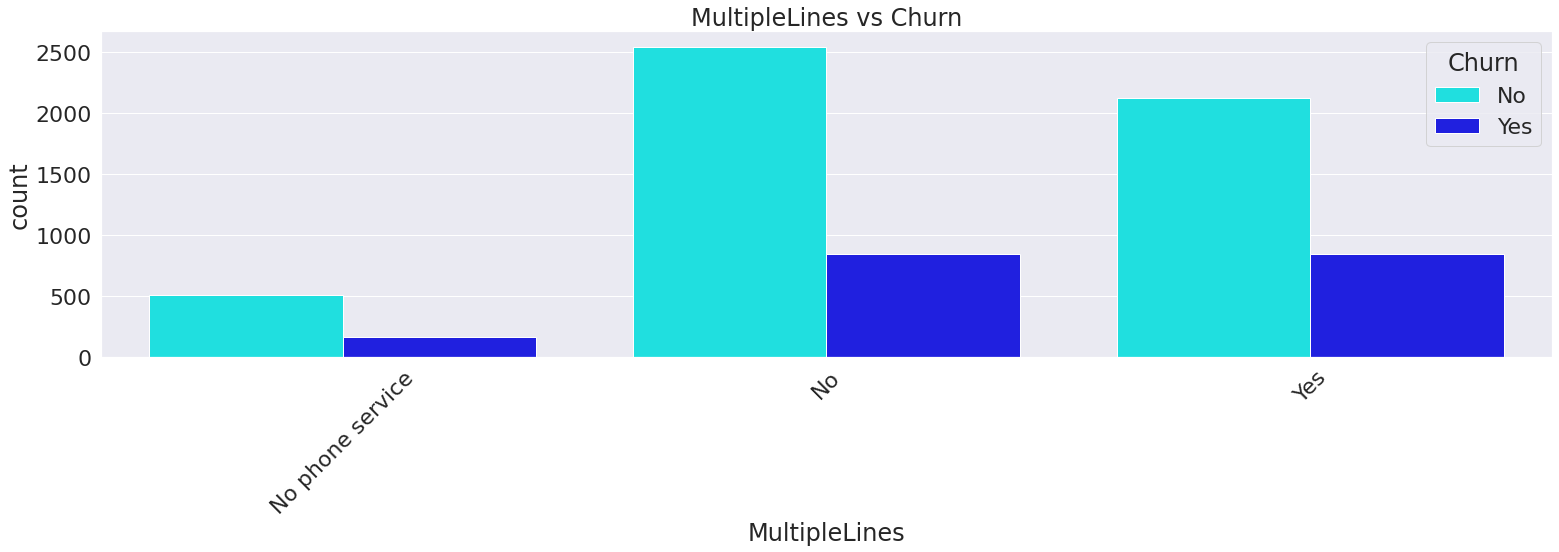

In [18]:
plt.figure(figsize=(26,6))
ax = sns.countplot(data=df, x ='MultipleLines',hue = 'Churn',palette=['cyan','blue'])
ax.tick_params(axis='x', rotation=45)
plt.title('MultipleLines vs Churn')
plt.show()

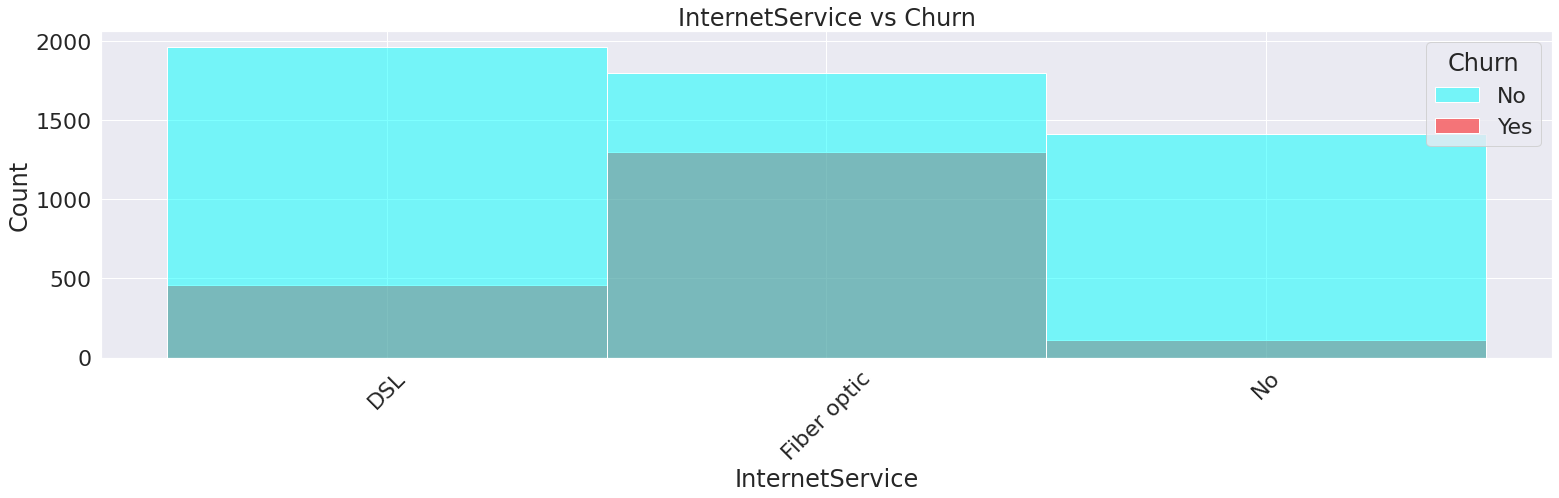

In [19]:
plt.figure(figsize=(26,6))
ax = sns.histplot(data=df, x ='InternetService',hue = 'Churn',legend=True,palette=['cyan','red'])
ax.tick_params(axis='x', rotation=45)
plt.title('InternetService vs Churn')
plt.show()

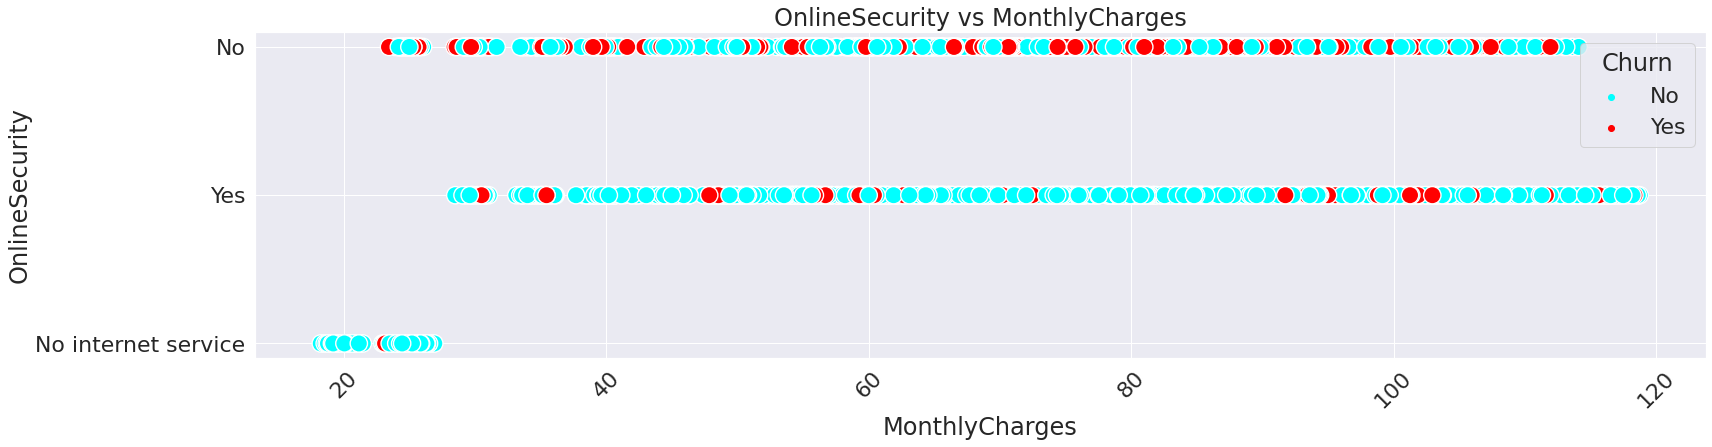

In [20]:
plt.figure(figsize=(26,6))
ax = sns.scatterplot(data=df, y ='OnlineSecurity',x = 'MonthlyCharges',hue = 'Churn',palette=['cyan','red'],s=300)
ax.tick_params(axis='x', rotation=45)
plt.title('OnlineSecurity vs MonthlyCharges')
plt.show()

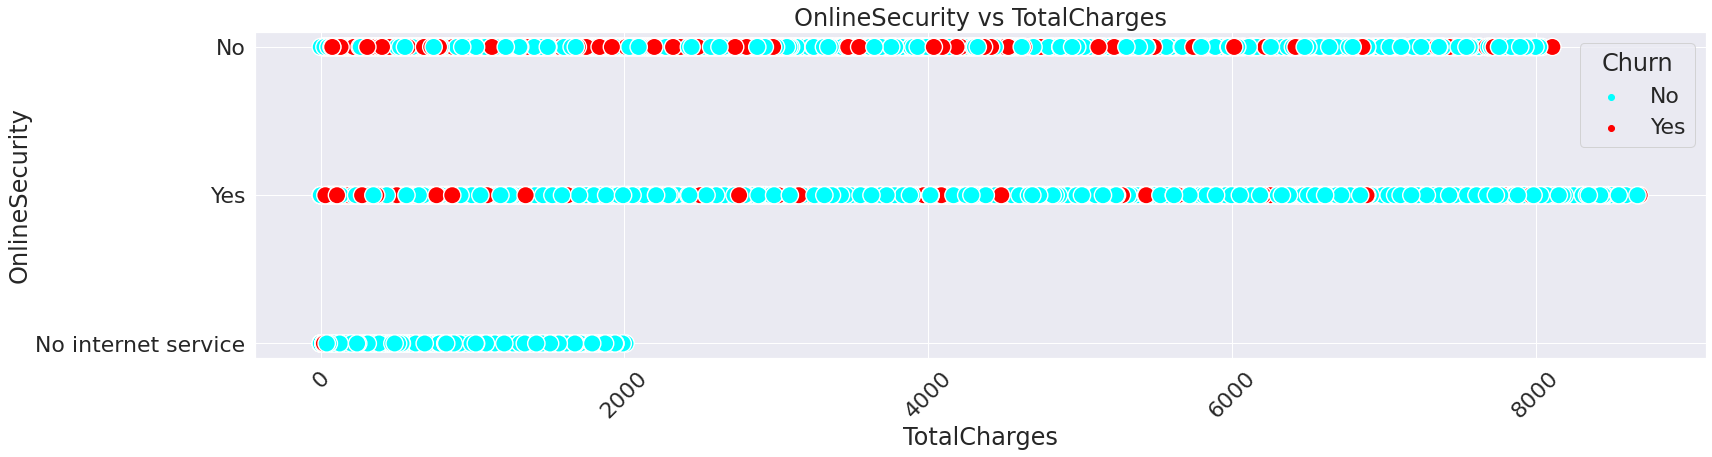

In [21]:
plt.figure(figsize=(26,6))
ax = sns.scatterplot(data=df, y ='OnlineSecurity',x = 'TotalCharges',hue = 'Churn',palette=['cyan','red'],s=300)
ax.tick_params(axis='x', rotation=45)
plt.title('OnlineSecurity vs TotalCharges')
plt.show()

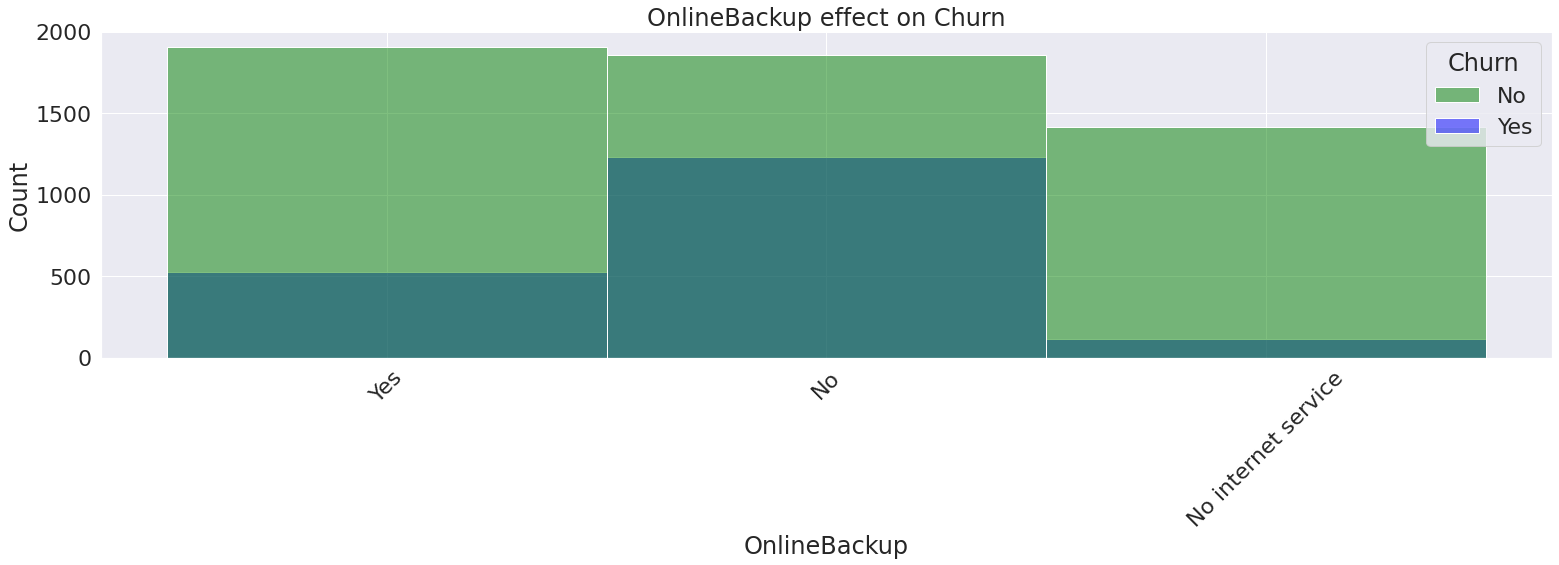

In [22]:
plt.figure(figsize=(26,6))
ax = sns.histplot(data=df, x ='OnlineBackup',hue = 'Churn',legend=True,palette=['green','blue'])
ax.tick_params(axis='x', rotation=45)
plt.title('OnlineBackup effect on Churn')
plt.show()

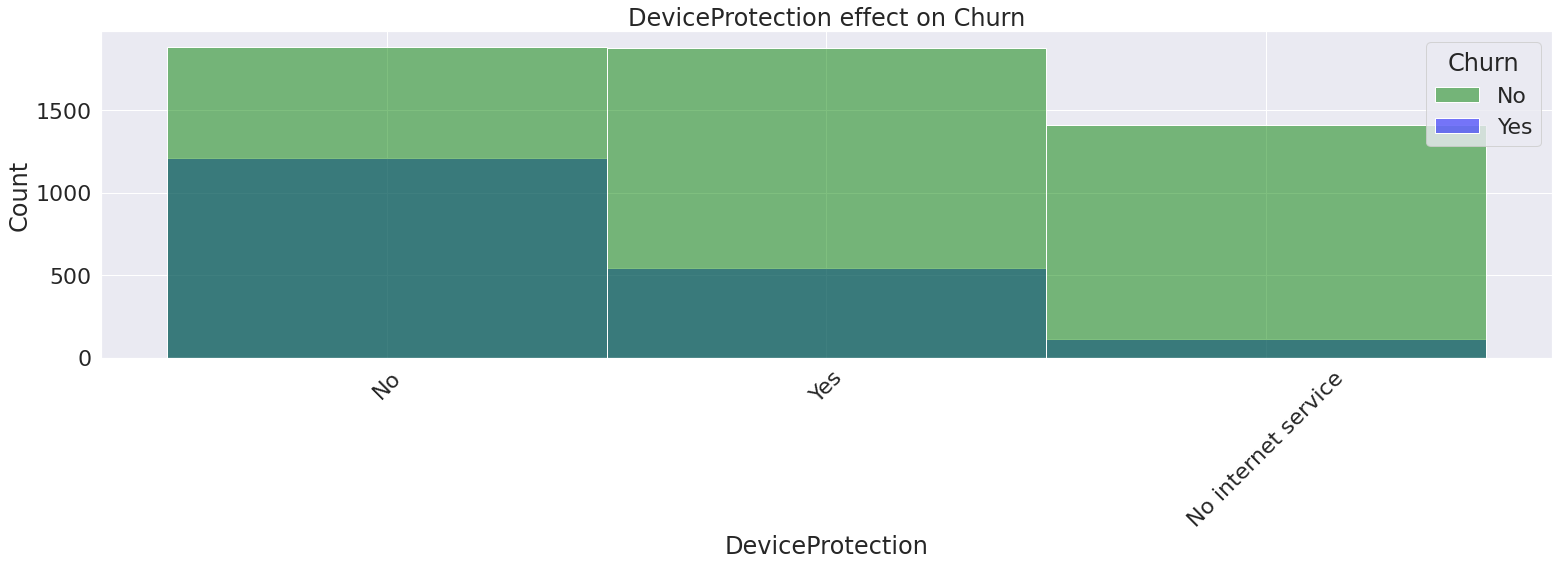

In [23]:
plt.figure(figsize=(26,6))
ax = sns.histplot(data=df, x ='DeviceProtection',hue = 'Churn',legend=True,palette=['green','blue'])
ax.tick_params(axis='x', rotation=45)
plt.title('DeviceProtection effect on Churn')
plt.show()

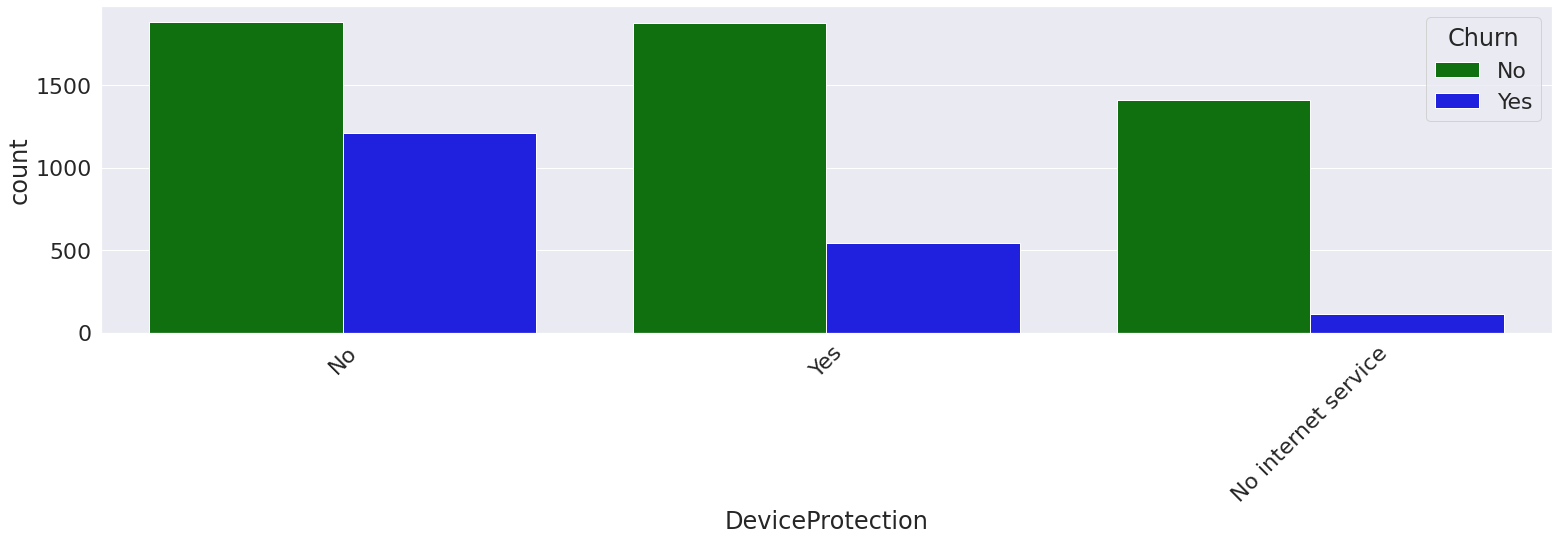

In [24]:
plt.figure(figsize=(26,6))
ax = sns.countplot(data=df, x ='DeviceProtection',hue = 'Churn',palette=['green','blue'])
ax.tick_params(axis='x', rotation=45)
plt.title('')
plt.show()

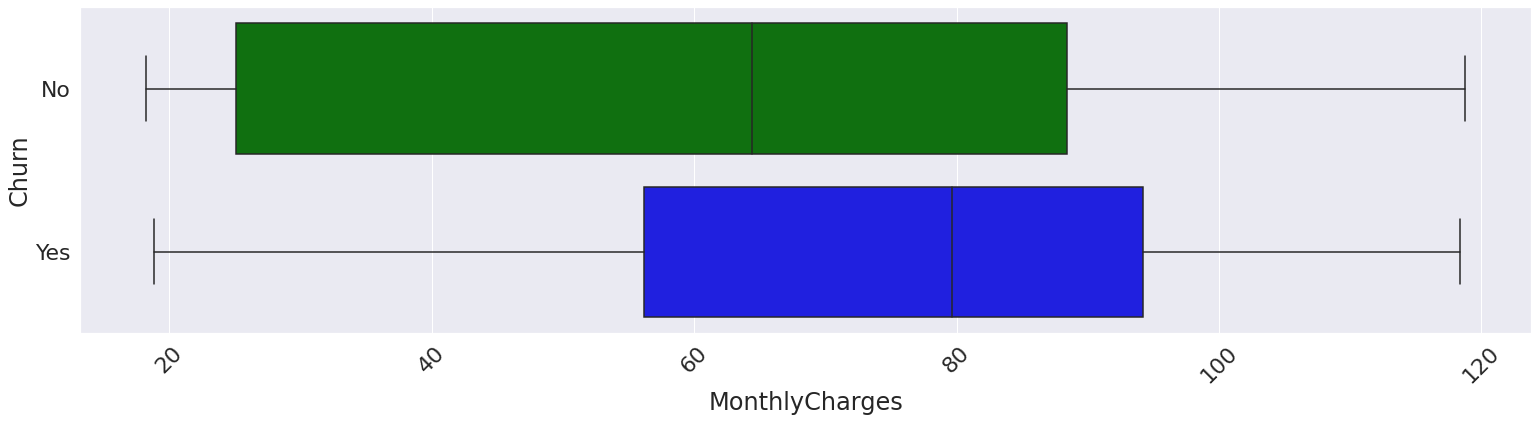

In [25]:
plt.figure(figsize=(26,6))
ax = sns.boxplot(data=df, x ='MonthlyCharges',y = 'Churn',palette=['green','blue'])
ax.tick_params(axis='x', rotation=45)
plt.title('')
plt.show()

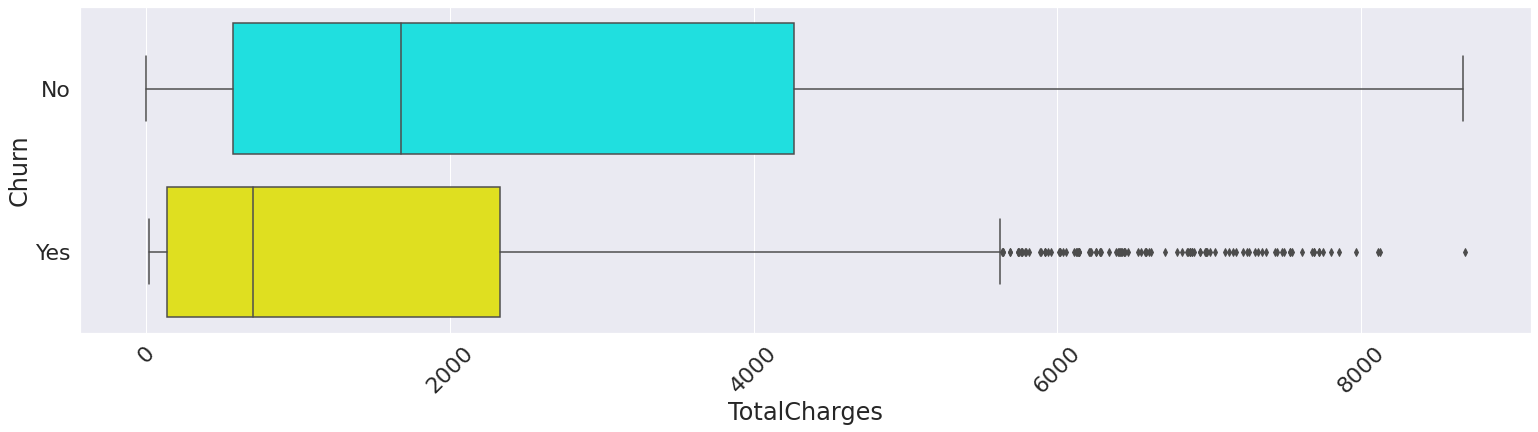

In [26]:
plt.figure(figsize=(26,6))
ax = sns.boxplot(data=df, x ='TotalCharges',y = 'Churn',palette=['cyan','yellow'])
ax.tick_params(axis='x', rotation=45)
plt.title('')
plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

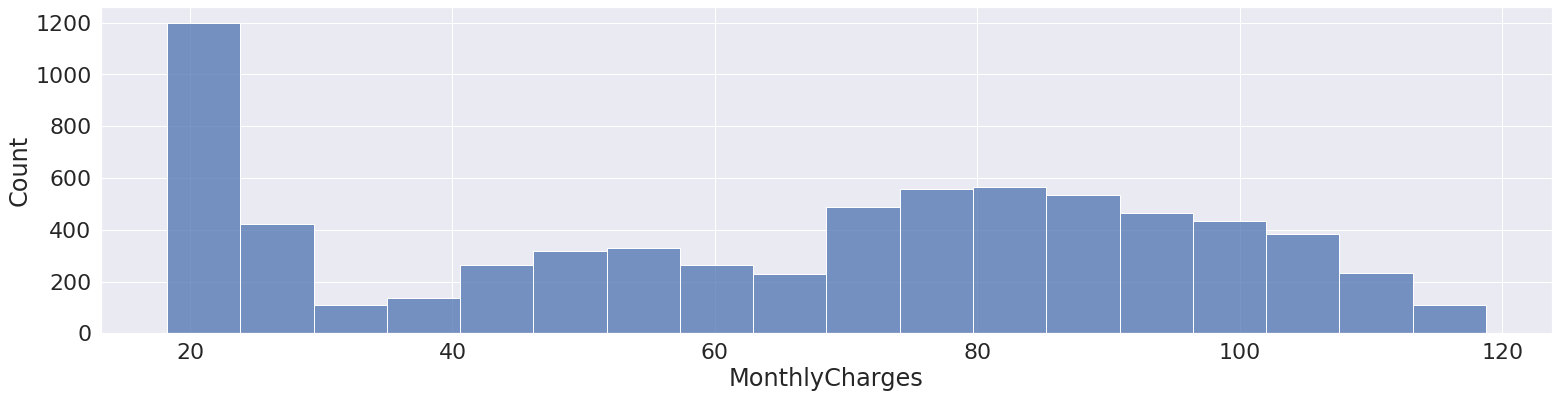

In [27]:
plt.figure(figsize=(26,6))
sns.histplot(data=df,x ='MonthlyCharges')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

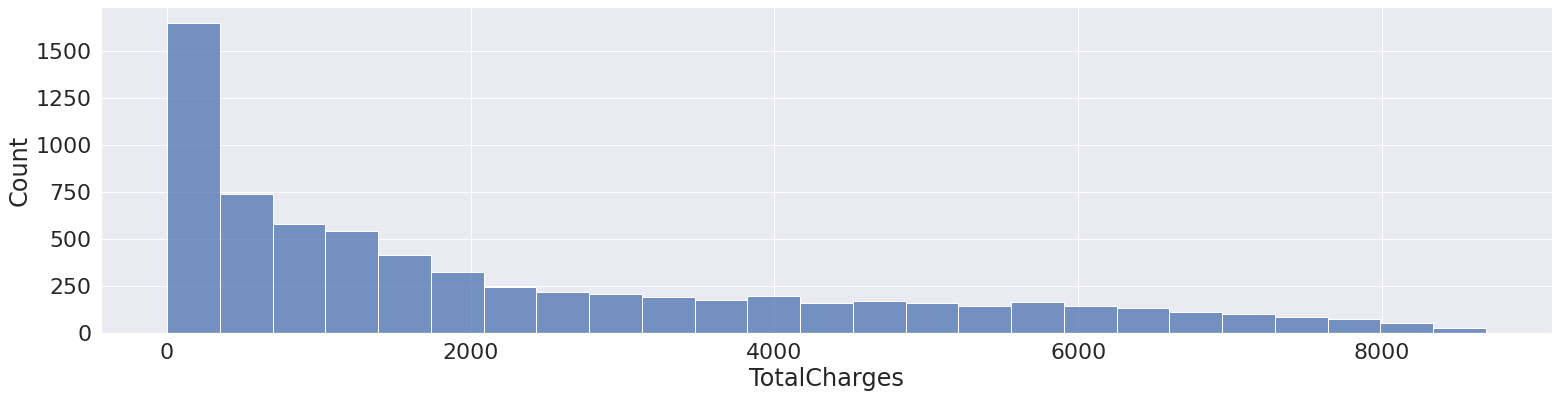

In [28]:
plt.figure(figsize=(26,6))
sns.histplot(data=df,x ='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='count'>

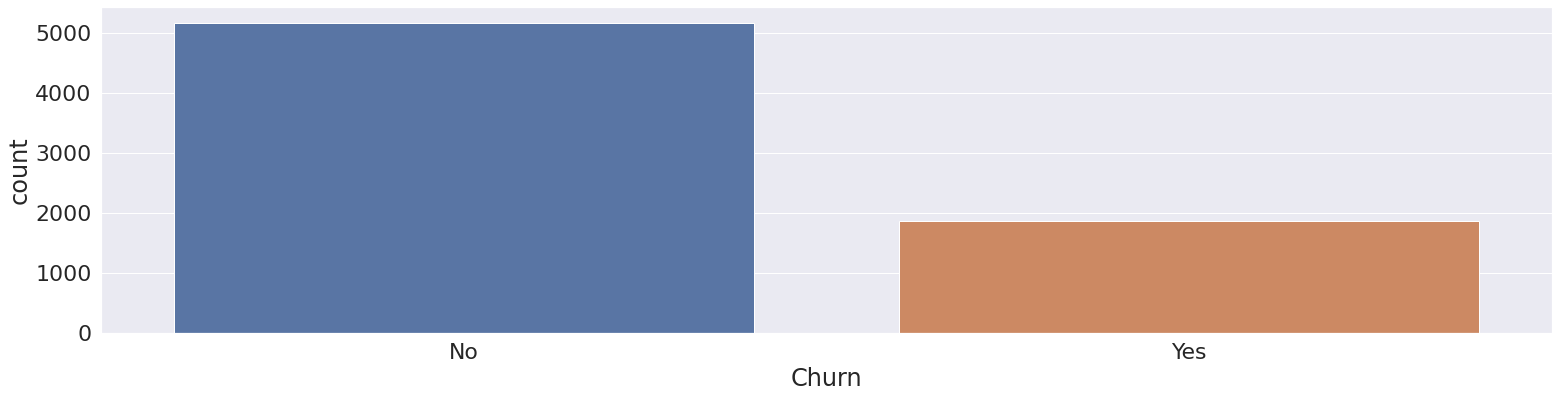

In [29]:
plt.figure(figsize=(26,6))
sns.countplot(data=df,x='Churn')

<AxesSubplot:>

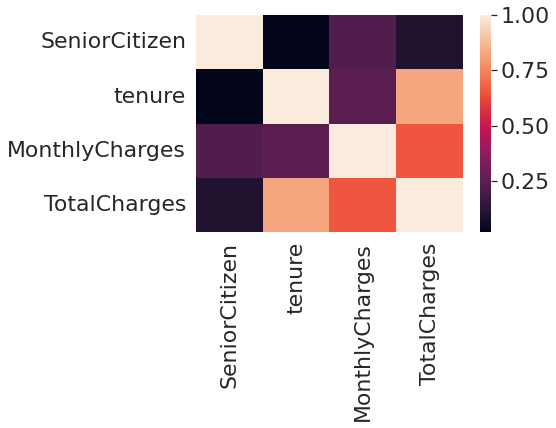

In [30]:
sns.heatmap(df.corr())

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
ohe = OneHotEncoder()
scaler = StandardScaler()
le = LabelEncoder()

c1 = df.select_dtypes("object").columns[1:-1]
df1 = pd.DataFrame(ohe.fit_transform(df[c1]).toarray(), index=df.index)

df2 = df.drop(columns=c1).iloc[:,1:-1]
df2 = pd.DataFrame(scaler.fit_transform(df2))

final = pd.concat([df1,df2], axis=1)

In [32]:
final.columns=[a for a in range(0,len(final.columns))]
x = final
y = le.fit_transform(df.iloc[:,-1])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)

In [35]:
xtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2712,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.439916,-0.992402,-1.176941,-0.910286
2907,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.439916,-0.503758,0.805583,-0.202628
6836,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.273159,-1.073843,0.646050,-0.776740
6110,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.439916,-0.544478,-0.164907,-0.506868
1851,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,-1.236724,-0.985834,-0.975449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.439916,-0.829521,-0.213099,-0.679062
565,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.439916,1.572981,0.202351,1.188399
819,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.439916,1.532261,0.772347,1.635340
1691,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.439916,1.125057,-1.499330,-0.493236


In [36]:
xtest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
5131,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.439916,0.473531,1.041558,0.919587
6587,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.273159,1.287938,1.287504,1.883373
5503,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.439916,0.107048,-1.486035,-0.676326
988,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.439916,-0.218715,-1.515947,-0.768710
6089,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.273159,-1.277445,0.858760,-0.965809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.439916,1.613701,-1.510962,-0.430124
5728,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.439916,-0.788800,0.818877,-0.506206
4960,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.273159,0.717853,1.028264,1.119266
6096,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.273159,-1.277445,0.180747,-0.974809


In [37]:
!pip install sweetviz
import sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 45.2 MB/s eta 0:00:00


In [38]:
report1 = sv.analyze(df)
report1.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
report2 = sv.compare([xtrain, "Training Data"], [xtest, "Test Data"])
report2.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
